In [2]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding

from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")


Done


In [33]:
Crema_Path='Crema/'
Ravdess_Path='Ravdess/audio_speech_actors_01-24/'
Savee_Path='Savee/'
Tess_Path='Tess/'

In [34]:
ravdess_directory_list = os.listdir(Ravdess_Path)
print(ravdess_directory_list)

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


In [35]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess_Path + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess_Path + i + '/' + f)

In [36]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-08-01-02-01-08.wav
03
Ravdess/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav
1
03-01-01-01-02-02-08.wav


In [37]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0    angry  Ravdess/audio_speech_actors_01-24/Actor_16/03-...
1     fear  Ravdess/audio_speech_actors_01-24/Actor_16/03-...
2     fear  Ravdess/audio_speech_actors_01-24/Actor_16/03-...
3    angry  Ravdess/audio_speech_actors_01-24/Actor_16/03-...
4  disgust  Ravdess/audio_speech_actors_01-24/Actor_16/03-...
______________________________________________
     Emotions                                               Path
1435    happy  Ravdess/audio_speech_actors_01-24/Actor_08/03-...
1436    happy  Ravdess/audio_speech_actors_01-24/Actor_08/03-...
1437  neutral  Ravdess/audio_speech_actors_01-24/Actor_08/03-...
1438  neutral  Ravdess/audio_speech_actors_01-24/Actor_08/03-...
1439  neutral  Ravdess/audio_speech_actors_01-24/Actor_08/03-...
_______________________________________________
Emotions
neutral     288
angry       192
fear        192
disgust     192
sad         192
surprise    192
happy       192
Name: count, dtype: in

In [38]:
crema_directory_list = os.listdir(Crema_Path)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema_Path + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
sad        1271
fear       1271
happy      1271
neutral    1087
Name: count, dtype: int64


In [39]:
tess_directory_list = os.listdir(Tess_Path)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess_Path + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess_Path + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
disgust     400
surprise    400
happy       400
sad         400
neutral     400
fear        400
angry       400
Name: count, dtype: int64


In [40]:
savee_directory_list = os.listdir(Savee_Path)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee_Path + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
sad          60
surprise     60
fear         60
disgust      60
happy        60
angry        60
Name: count, dtype: int64


In [41]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,Ravdess/audio_speech_actors_01-24/Actor_16/03-...
1,fear,Ravdess/audio_speech_actors_01-24/Actor_16/03-...
2,fear,Ravdess/audio_speech_actors_01-24/Actor_16/03-...
3,angry,Ravdess/audio_speech_actors_01-24/Actor_16/03-...
4,disgust,Ravdess/audio_speech_actors_01-24/Actor_16/03-...


In [42]:
print(data_path.Emotions.value_counts())

Emotions
angry       1923
fear        1923
disgust     1923
sad         1923
happy       1923
neutral     1895
surprise     652
Name: count, dtype: int64


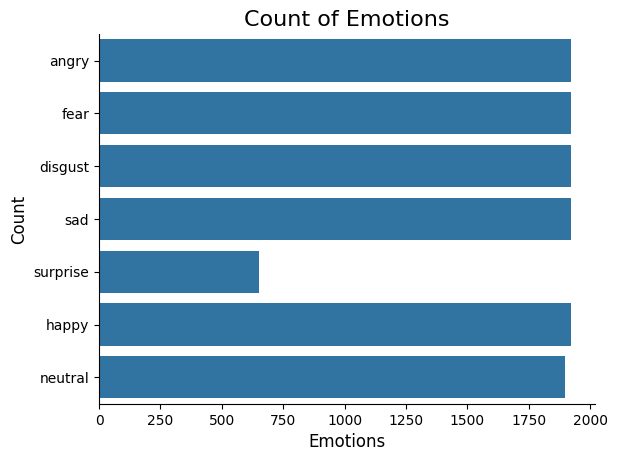

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [44]:
data,sr = librosa.load(file_path[0])
print(file_path[0])
sr

Savee/JK_sa01.wav


22050

In [45]:
ipd.Audio(data,rate=sr)

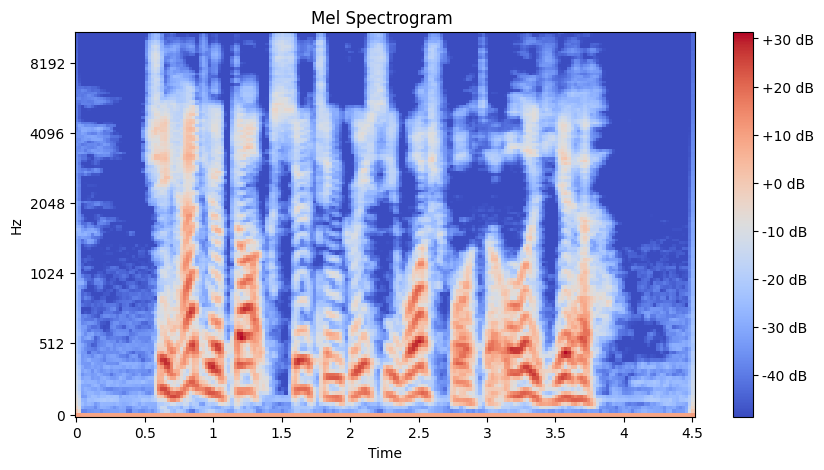

In [46]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

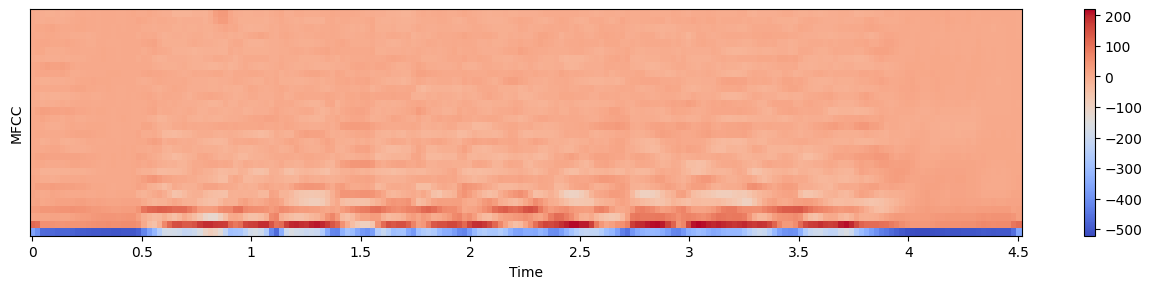

In [47]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [61]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    # return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)


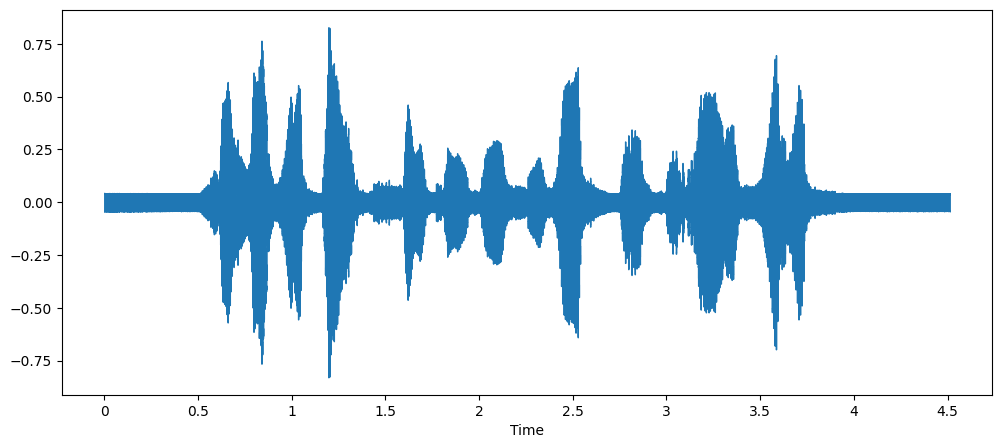

In [62]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

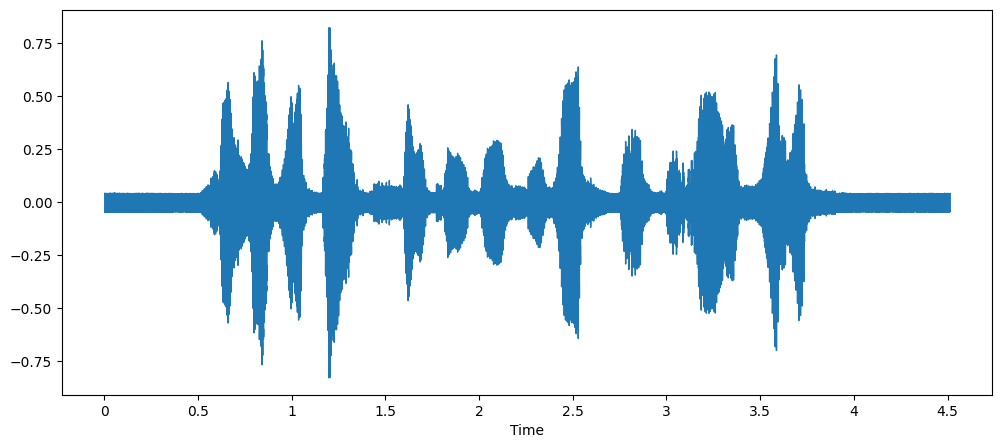

In [63]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [64]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    # rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)

    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    # mfcc=librosa.feature.mfcc(data,sr=sr)
    mfcc = librosa.feature.mfcc(y=data, sr=sr)

    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [65]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  10


In [66]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

4it [00:01,  3.08it/s]

0 audio has been processed


505it [00:23, 23.64it/s]

500 audio has been processed


1003it [00:44, 24.23it/s]

1000 audio has been processed


1505it [01:04, 30.32it/s]

1500 audio has been processed


2005it [01:21, 31.53it/s]

2000 audio has been processed


2505it [01:37, 32.46it/s]

2500 audio has been processed


3007it [01:53, 31.15it/s]

3000 audio has been processed


3505it [02:08, 31.48it/s]

3500 audio has been processed


4006it [02:24, 28.75it/s]

4000 audio has been processed


4505it [02:40, 31.60it/s]

4500 audio has been processed


5006it [02:56, 28.48it/s]

5000 audio has been processed


5507it [03:11, 32.07it/s]

5500 audio has been processed


6005it [03:26, 33.77it/s]

6000 audio has been processed


6505it [03:41, 32.47it/s]

6500 audio has been processed


7005it [03:57, 34.31it/s]

7000 audio has been processed


7508it [04:12, 35.93it/s]

7500 audio has been processed


8006it [04:26, 32.85it/s]

8000 audio has been processed


8505it [04:41, 36.01it/s]

8500 audio has been processed


9007it [04:55, 33.74it/s]

9000 audio has been processed


9507it [05:08, 38.69it/s]

9500 audio has been processed


10005it [05:20, 42.17it/s]

10000 audio has been processed


10509it [05:29, 46.30it/s]

10500 audio has been processed


11005it [05:40, 42.58it/s]

11000 audio has been processed


11505it [05:53, 35.06it/s]

11500 audio has been processed


12005it [06:09, 28.93it/s]

12000 audio has been processed


12162it [06:15, 32.42it/s]

Done
Time:  375.110429458


In [67]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

In [68]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.000000,0.051758,0.257812,0.450195,0.645996,0.669434,0.463379,0.270996,0.211914,0.354004,...,0.857721,0.094369,-0.881575,-2.292752,-3.886959,-5.131240,-5.645915,-5.510086,-5.180731,angry
1,0.253906,0.381836,0.505859,0.498535,0.498535,0.493652,0.499512,0.497559,0.490234,0.488770,...,1.271425,4.221319,2.202514,-1.011169,0.791326,-1.528398,-5.933281,1.630323,5.017225,angry
2,0.193848,0.272461,0.345703,0.315918,0.290527,0.296387,0.333496,0.405273,0.472168,0.520020,...,0.060210,-0.241738,-0.856128,-1.832461,-2.836158,-3.436000,-3.474018,-3.184945,-2.961168,angry
3,0.250000,0.365234,0.503906,0.502441,0.509277,0.523438,0.499512,0.496582,0.490723,0.479492,...,-5.163071,-3.438855,-4.374934,0.408960,0.993509,-0.144790,5.864842,3.306772,-0.147765,angry
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.912132,8.608451,6.253415,-3.000351,-3.556976,-0.099310,0.656089,-3.026768,-6.480433,fear


In [69]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.000000,0.051758,0.257812,0.450195,0.645996,0.669434,0.463379,0.270996,0.211914,0.354004,...,0.857721,0.094369,-0.881575,-2.292752,-3.886959,-5.131240,-5.645915,-5.510086,-5.180731,angry
1,0.253906,0.381836,0.505859,0.498535,0.498535,0.493652,0.499512,0.497559,0.490234,0.488770,...,1.271425,4.221319,2.202514,-1.011169,0.791326,-1.528398,-5.933281,1.630323,5.017225,angry
2,0.193848,0.272461,0.345703,0.315918,0.290527,0.296387,0.333496,0.405273,0.472168,0.520020,...,0.060210,-0.241738,-0.856128,-1.832461,-2.836158,-3.436000,-3.474018,-3.184945,-2.961168,angry
3,0.250000,0.365234,0.503906,0.502441,0.509277,0.523438,0.499512,0.496582,0.490723,0.479492,...,-5.163071,-3.438855,-4.374934,0.408960,0.993509,-0.144790,5.864842,3.306772,-0.147765,angry
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.912132,8.608451,6.253415,-3.000351,-3.556976,-0.099310,0.656089,-3.026768,-6.480433,fear


In [70]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [71]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(48648, 2377)

In [72]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [73]:


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [74]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [75]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 2376)

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [77]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [78]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [80]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [86]:
# early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)


In [82]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [84]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,59

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [87]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5451 - loss: 1.1636

609/609 ━━━━━━━━━━━━━━━━━━━━ 1550s 3s/step - accuracy: 0.5452 - loss: 1.1636 - val_accuracy: 0.5164 - val_loss: 1.3232 - learning_rate: 0.0010
Epoch 2/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5877 - loss: 1.0625

609/609 ━━━━━━━━━━━━━━━━━━━━ 1559s 3s/step - accuracy: 0.5878 - loss: 1.0624 - val_accuracy: 0.5911 - val_loss: 1.0697 - learning_rate: 0.0010
Epoch 3/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6530 - loss: 0.8997

609/609 ━━━━━━━━━━━━━━━━━━━━ 1515s 2s/step - accuracy: 0.6530 - loss: 0.8997 - val_accuracy: 0.6191 - val_loss: 0.9926 - learning_rate: 0.0010
Epoch 4/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1499s 2s/step - accuracy: 0.6920 - loss: 0.8039 - val_accuracy: 0.5364 - val_loss: 1.2670 - learning_rate: 0.0010
Epoch 5/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7073 - loss: 0.7769

609/609 ━━━━━━━━━━━━━━━━━━━━ 1531s 3s/step - accuracy: 0.7073 - loss: 0.7768 - val_accuracy: 0.6835 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 6/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7790 - loss: 0.5980

609/609 ━━━━━━━━━━━━━━━━━━━━ 1635s 3s/step - accuracy: 0.7790 - loss: 0.5979 - val_accuracy: 0.7686 - val_loss: 0.8367 - learning_rate: 0.0010
Epoch 7/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8424 - loss: 0.4364

609/609 ━━━━━━━━━━━━━━━━━━━━ 1646s 3s/step - accuracy: 0.8424 - loss: 0.4364 - val_accuracy: 0.7805 - val_loss: 0.6085 - learning_rate: 0.0010
Epoch 8/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1628s 3s/step - accuracy: 0.8683 - loss: 0.3706 - val_accuracy: 0.7565 - val_loss: 0.7144 - learning_rate: 0.0010
Epoch 9/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8574 - loss: 0.3989

609/609 ━━━━━━━━━━━━━━━━━━━━ 1571s 3s/step - accuracy: 0.8575 - loss: 0.3988 - val_accuracy: 0.8553 - val_loss: 0.4113 - learning_rate: 0.0010
Epoch 10/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9412 - loss: 0.1741

609/609 ━━━━━━━━━━━━━━━━━━━━ 1574s 3s/step - accuracy: 0.9412 - loss: 0.1741 - val_accuracy: 0.8823 - val_loss: 0.3528 - learning_rate: 0.0010
Epoch 11/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9447 - loss: 0.1605

609/609 ━━━━━━━━━━━━━━━━━━━━ 1566s 3s/step - accuracy: 0.9447 - loss: 0.1605 - val_accuracy: 0.9032 - val_loss: 0.3005 - learning_rate: 0.0010
Epoch 12/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1573s 3s/step - accuracy: 0.9445 - loss: 0.1618 - val_accuracy: 0.8326 - val_loss: 1.0739 - learning_rate: 0.0010
Epoch 13/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1585s 3s/step - accuracy: 0.8976 - loss: 0.3082 - val_accuracy: 0.8984 - val_loss: 0.3018 - learning_rate: 0.0010
Epoch 14/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8947 - loss: 0.3045

609/609 ━━━━━━━━━━━━━━━━━━━━ 1614s 3s/step - accuracy: 0.8948 - loss: 0.3043 - val_accuracy: 0.9295 - val_loss: 0.2121 - learning_rate: 0.0010
Epoch 15/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9796 - loss: 0.0672

609/609 ━━━━━━━━━━━━━━━━━━━━ 1628s 3s/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.9304 - val_loss: 0.2217 - learning_rate: 0.0010
Epoch 16/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1770s 3s/step - accuracy: 0.9453 - loss: 0.1679 - val_accuracy: 0.8889 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 17/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1706s 3s/step - accuracy: 0.9307 - loss: 0.2086 - val_accuracy: 0.9233 - val_loss: 0.2367 - learning_rate: 0.0010
Epoch 18/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9271 - loss: 0.2301

609/609 ━━━━━━━━━━━━━━━━━━━━ 1680s 3s/step - accuracy: 0.9271 - loss: 0.2299 - val_accuracy: 0.9475 - val_loss: 0.1666 - learning_rate: 0.0010
Epoch 19/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9867 - loss: 0.0421

609/609 ━━━━━━━━━━━━━━━━━━━━ 1752s 3s/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9534 - val_loss: 0.1528 - learning_rate: 0.0010
Epoch 20/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9857 - loss: 0.0449

609/609 ━━━━━━━━━━━━━━━━━━━━ 1726s 3s/step - accuracy: 0.9857 - loss: 0.0449 - val_accuracy: 0.9535 - val_loss: 0.1577 - learning_rate: 0.0010
Epoch 21/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1740s 3s/step - accuracy: 0.9876 - loss: 0.0385 - val_accuracy: 0.9492 - val_loss: 0.1718 - learning_rate: 0.0010
Epoch 22/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1643s 3s/step - accuracy: 0.9777 - loss: 0.0679 - val_accuracy: 0.8945 - val_loss: 0.3649 - learning_rate: 0.0010
Epoch 23/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9163 - loss: 0.2673
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
609/609 ━━━━━━━━━━━━━━━━━━━━ 1600s 3s/step - accuracy: 0.9164 - loss: 0.2671 - val_accuracy: 0.9479 - val_loss: 0.1688 - learning_rate: 0.0010
Epoch 24/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9863 - loss: 0.0424

609/609 ━━━━━━━━━━━━━━━━━━━━ 1597s 3s/step - accuracy: 0.9863 - loss: 0.0424 - val_accuracy: 0.9651 - val_loss: 0.1180 - learning_rate: 5.0000e-04
Epoch 25/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9940 - loss: 0.0209

609/609 ━━━━━━━━━━━━━━━━━━━━ 1617s 3s/step - accuracy: 0.9940 - loss: 0.0209 - val_accuracy: 0.9688 - val_loss: 0.1129 - learning_rate: 5.0000e-04
Epoch 26/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9950 - loss: 0.0184

609/609 ━━━━━━━━━━━━━━━━━━━━ 1696s 3s/step - accuracy: 0.9950 - loss: 0.0184 - val_accuracy: 0.9699 - val_loss: 0.1061 - learning_rate: 5.0000e-04
Epoch 27/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9953 - loss: 0.0155

609/609 ━━━━━━━━━━━━━━━━━━━━ 1743s 3s/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9700 - val_loss: 0.1066 - learning_rate: 5.0000e-04
Epoch 28/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9972 - loss: 0.0113

609/609 ━━━━━━━━━━━━━━━━━━━━ 1623s 3s/step - accuracy: 0.9972 - loss: 0.0113 - val_accuracy: 0.9710 - val_loss: 0.0978 - learning_rate: 5.0000e-04
Epoch 29/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1569s 3s/step - accuracy: 0.9937 - loss: 0.0196 - val_accuracy: 0.9701 - val_loss: 0.1032 - learning_rate: 5.0000e-04
Epoch 30/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1622s 3s/step - accuracy: 0.9868 - loss: 0.0393 - val_accuracy: 0.9662 - val_loss: 0.1220 - learning_rate: 5.0000e-04
Epoch 31/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9958 - loss: 0.0156
Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
609/609 ━━━━━━━━━━━━━━━━━━━━ 1640s 3s/step - accuracy: 0.9958 - loss: 0.0156 - val_accuracy: 0.9703 - val_loss: 0.1106 - learning_rate: 5.0000e-04
Epoch 32/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9927 - loss: 0.0223

609/609 ━━━━━━━━━━━━━━━━━━━━ 1619s 3s/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9731 - val_loss: 0.0971 - learning_rate: 2.5000e-04
Epoch 33/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9973 - loss: 0.0095

609/609 ━━━━━━━━━━━━━━━━━━━━ 1668s 3s/step - accuracy: 0.9973 - loss: 0.0095 - val_accuracy: 0.9732 - val_loss: 0.0964 - learning_rate: 2.5000e-04
Epoch 34/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9984 - loss: 0.0059

609/609 ━━━━━━━━━━━━━━━━━━━━ 1651s 3s/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9737 - val_loss: 0.0940 - learning_rate: 2.5000e-04
Epoch 35/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9983 - loss: 0.0064

609/609 ━━━━━━━━━━━━━━━━━━━━ 1616s 3s/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9746 - val_loss: 0.0963 - learning_rate: 2.5000e-04
Epoch 36/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9985 - loss: 0.0062

609/609 ━━━━━━━━━━━━━━━━━━━━ 1627s 3s/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9768 - val_loss: 0.0937 - learning_rate: 2.5000e-04
Epoch 37/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1616s 3s/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9762 - val_loss: 0.0960 - learning_rate: 2.5000e-04
Epoch 38/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1619s 3s/step - accuracy: 0.9955 - loss: 0.0150 - val_accuracy: 0.9750 - val_loss: 0.0958 - learning_rate: 2.5000e-04
Epoch 39/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9979 - loss: 0.0078
Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
609/609 ━━━━━━━━━━━━━━━━━━━━ 1596s 3s/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9742 - val_loss: 0.0907 - learning_rate: 2.5000e-04
Epoch 40/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9977 - loss: 0.0075

609/609 ━━━━━━━━━━━━━━━━━━━━ 1597s 3s/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9769 - val_loss: 0.0834 - learning_rate: 1.2500e-04
Epoch 41/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9987 - loss: 0.0049

609/609 ━━━━━━━━━━━━━━━━━━━━ 1549s 3s/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9776 - val_loss: 0.0851 - learning_rate: 1.2500e-04
Epoch 42/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1565s 3s/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9775 - val_loss: 0.0813 - learning_rate: 1.2500e-04
Epoch 43/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9984 - loss: 0.0054

609/609 ━━━━━━━━━━━━━━━━━━━━ 1579s 3s/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9779 - val_loss: 0.0826 - learning_rate: 1.2500e-04
Epoch 44/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9990 - loss: 0.0050

609/609 ━━━━━━━━━━━━━━━━━━━━ 1547s 3s/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 0.9789 - val_loss: 0.0805 - learning_rate: 1.2500e-04
Epoch 45/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9992 - loss: 0.0032

609/609 ━━━━━━━━━━━━━━━━━━━━ 1576s 3s/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9800 - val_loss: 0.0810 - learning_rate: 1.2500e-04
Epoch 46/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1566s 3s/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9789 - val_loss: 0.0841 - learning_rate: 1.2500e-04
Epoch 47/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1567s 3s/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9778 - val_loss: 0.0898 - learning_rate: 1.2500e-04
Epoch 48/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9979 - loss: 0.0069
Epoch 48: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
609/609 ━━━━━━━━━━━━━━━━━━━━ 1566s 3s/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.9782 - val_loss: 0.0911 - learning_rate: 1.2500e-04
Epoch 49/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1545s 3s/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9782 - val_loss: 0.0864 - learning_rate: 6.2500e-05
Epoch 50/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1610s 3s/step - accuracy: 

305/305 ━━━━━━━━━━━━━━━━━━━━ 100s 328ms/step - accuracy: 0.9816 - loss: 0.0730
Accuracy of our model on test data :  97.99588918685913 %


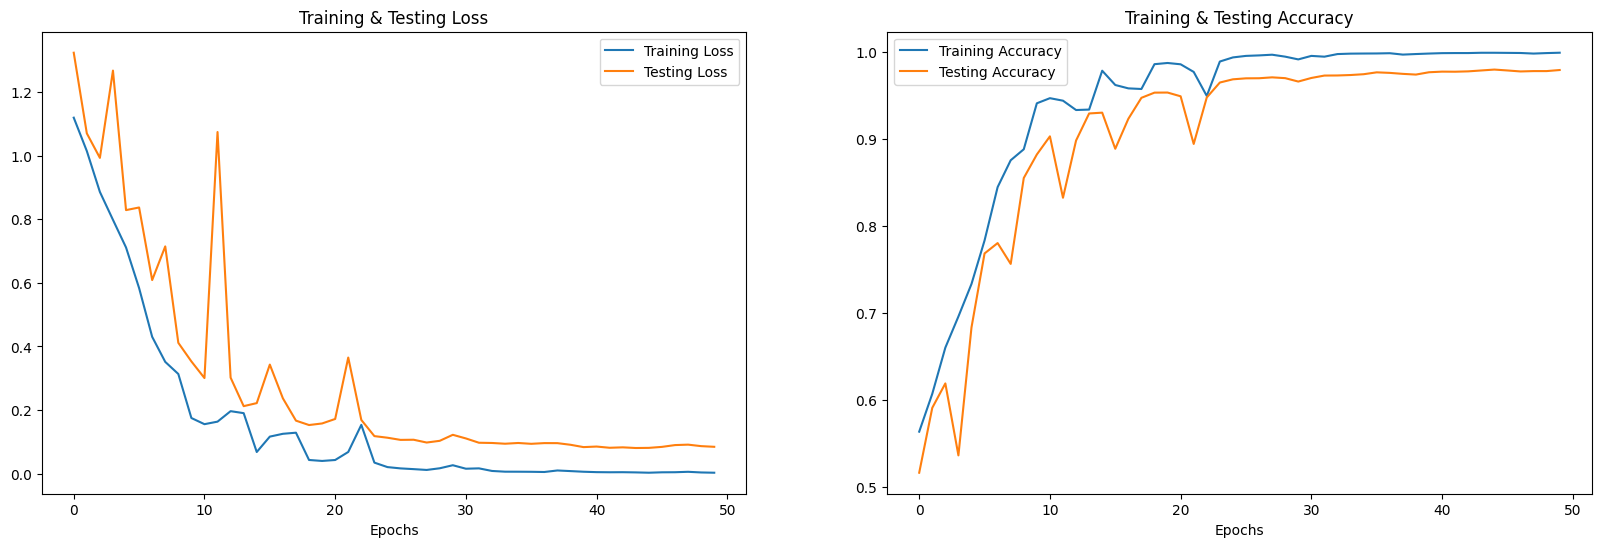

In [88]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [89]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 ━━━━━━━━━━━━━━━━━━━━ 97s 319ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,happy,happy
2,sad,sad
3,happy,angry
4,happy,happy
5,happy,happy
6,happy,happy
7,disgust,disgust
8,disgust,disgust
9,fear,fear


In [90]:
model_path = "New_emotion_model.h5"

model.save(model_path)

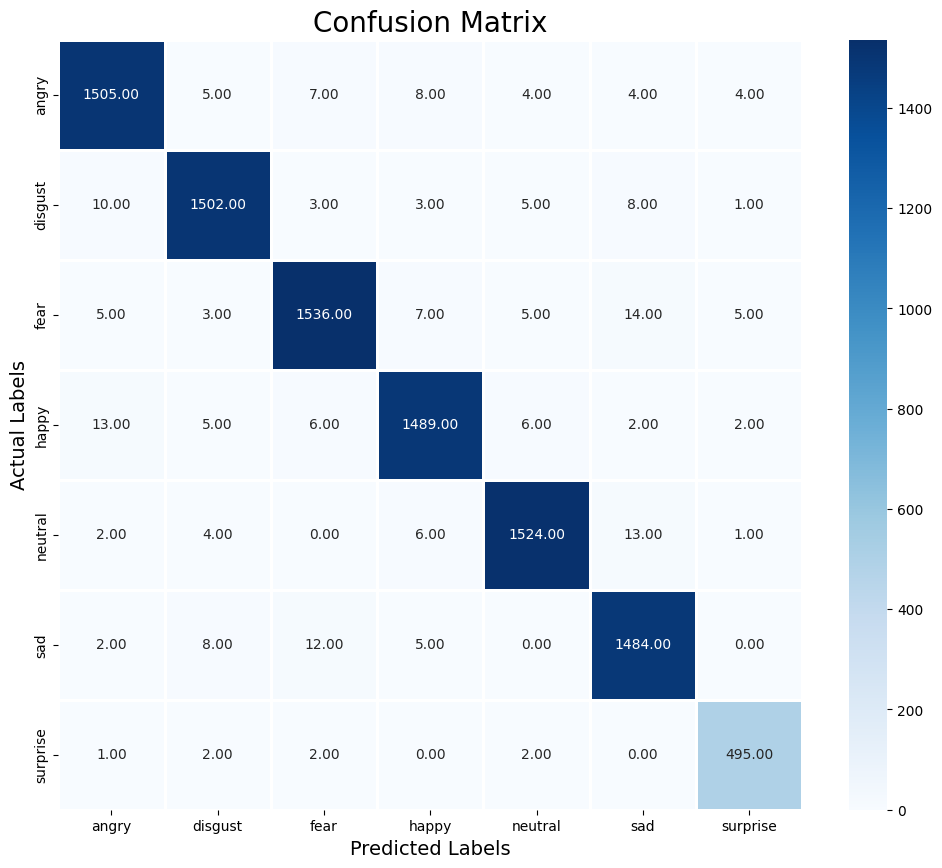

              precision    recall  f1-score   support

       angry       0.98      0.98      0.98      1537
     disgust       0.98      0.98      0.98      1532
        fear       0.98      0.98      0.98      1575
       happy       0.98      0.98      0.98      1523
     neutral       0.99      0.98      0.98      1550
         sad       0.97      0.98      0.98      1511
    surprise       0.97      0.99      0.98       502

    accuracy                           0.98      9730
   macro avg       0.98      0.98      0.98      9730
weighted avg       0.98      0.98      0.98      9730



In [91]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [96]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")  

Done


In [97]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)
    
    return final_result

In [98]:
res=get_predict_feat("Ravdess/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

(1, 2376, 1)


In [101]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [103]:
prediction("Ravdess/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
neutral
